In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from sklearn import metrics
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
%matplotlib inline

In [2]:
# define the number of kilometers in one radian
kms_per_radian = 6371.0088

In [3]:
fields = ['lat','long']

In [4]:
df = pd.read_csv('all.csv',encoding='utf-8',nrows=10000,usecols=fields)
df.head()

,lat,long
0,39.984702,116.318417
1,39.984683,116.318450
2,39.984686,116.318417
3,39.984688,116.318385
4,39.984655,116.318263


In [5]:
coords = df.as_matrix(columns=['lat', 'long'])

In [6]:
# define epsilon as 1.5 kilometers, converted to radians for use by haversine
epsilon = 1.5 / kms_per_radian

In [7]:
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_

# get the number of clusters
num_clusters = len(set(cluster_labels))


In [8]:
# turn the clusters in to a pandas series, where each element is a cluster of points
clusters = pd.Series([coords[cluster_labels==n] for n in range(num_clusters)])

In [10]:
clusters[0]

array([[  39.984702,  116.318417],
       [  39.984683,  116.31845 ],
       [  39.984686,  116.318417],
       ..., 
       [  40.007365,  116.325046],
       [  40.007406,  116.325077],
       [  40.007446,  116.32508 ]])

## Visualization on Map

In [12]:
import smopy 
%matplotlib inline

In [13]:
lat_min=min(df.lat)
lon_min=min(df.long)
lat_max=max(df.lat)
lon_max=max(df.long)

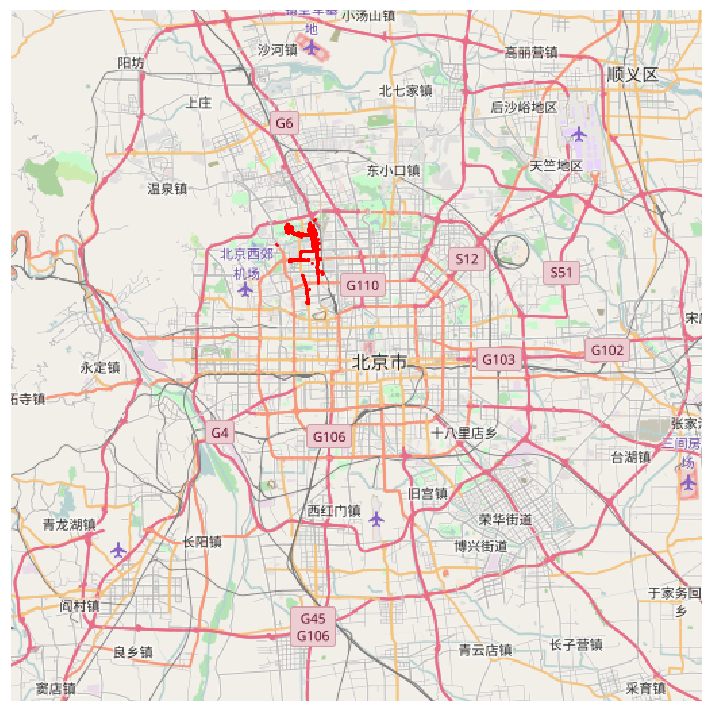

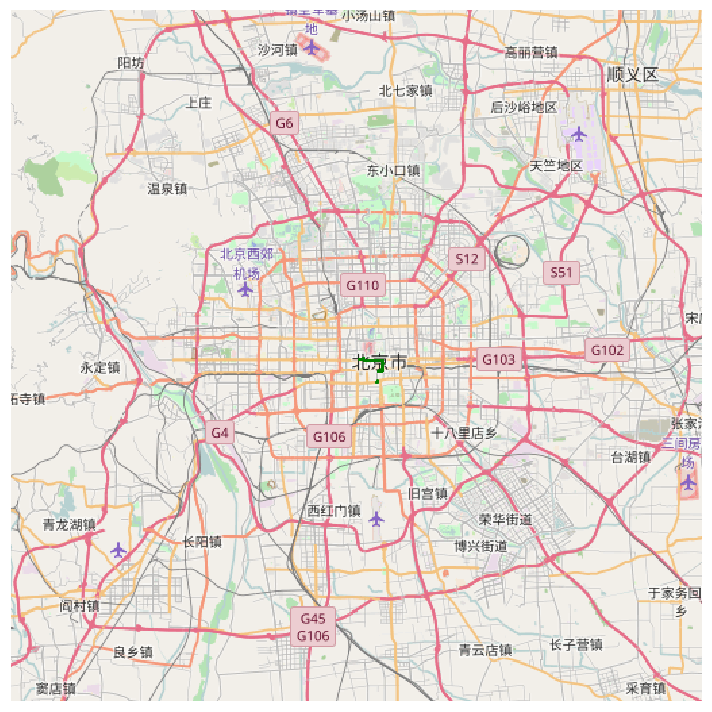

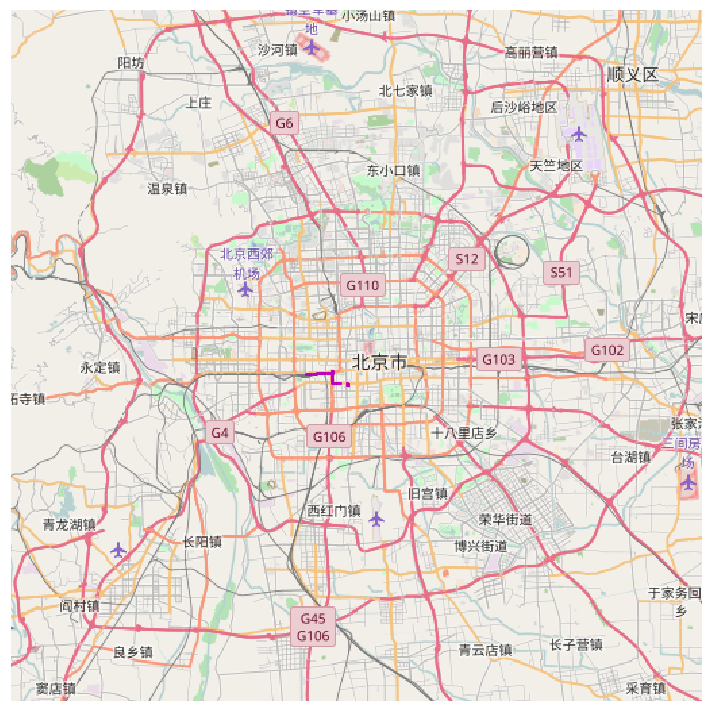

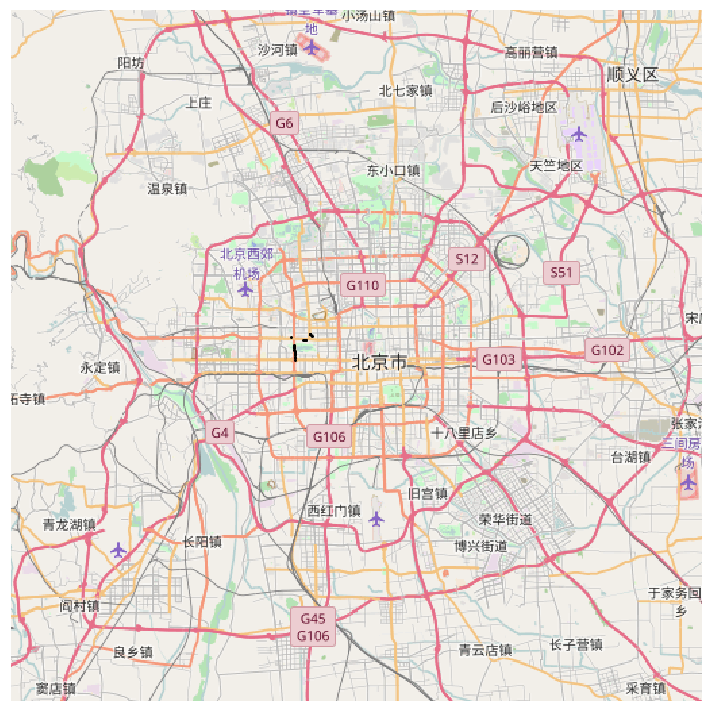

In [42]:
col=['r','g','m','k']
map = smopy.Map((lat_min,lon_min,lat_max,lon_max), z=10)
for i in range(4):
    x, y = map.to_pixels(clusters[i][:,0], clusters[i][:,1])
    ax = map.show_mpl(figsize=(10, 10))
    ax.plot(x, y, 'or', ms=2,color=col[i])
#map.show_ipython()